In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fp_b = r"data\04_oct_cleaned_pickled_batter_data.pkl"
fp_p = r"data\04_oct_cleaned_pickled_pitcher_data.pkl"

## Batters

In [3]:
b_raw = pd.read_pickle(fp_b)

In [4]:
dims = ["player_name", "year", "team"]
xdims = ["age", "position"]
sal = ["salary", "log_salary", "next_year_salary", "next_year_log_salary", "league_min", "salary_over_minimum", "player_at_min"]
stats = ["avg", "hr", "obp", "ops", "pa", "rbi", "slg", "war"]

In [55]:
batters = (b_raw
           .sort_values(dims)
           .assign(one=1)
           .pipe(lambda df: df.assign(year_num=df.groupby(["player_name"]).one.cumsum()))
           .pipe(lambda df: df.assign(position=df.position.apply(lambda s: s.replace(",", " ").split(" ")[0])))
          )

In [56]:
batters.head()

,age,avg,hr,obp,ops,pa,player_name,position,rbi,salary,...,war,year,log_salary,next_year_salary,next_year_log_salary,league_min,salary_over_minimum,player_at_min,one,year_num
2100,31,0.270,13.0,0.373,0.786,505.0,A.J. Ellis,Catcher,52.0,490000.0,...,3.4,2012,13.102161,421000.0,12.950388,480000.0,-59000.0,1.0,1,1
2105,32,0.238,10.0,0.318,0.682,448.0,A.J. Ellis,Catcher,52.0,2000000.0,...,2.3,2013,14.508658,490000.0,13.102161,507500.0,-17500.0,1.0,1,2
2113,33,0.191,3.0,0.323,0.577,347.0,A.J. Ellis,Catcher,25.0,3550000.0,...,0.0,2014,15.082458,2000000.0,14.508658,507500.0,1492500.0,0.0,1,3
2117,34,0.238,7.0,0.355,0.758,217.0,A.J. Ellis,Catcher,21.0,4250000.0,...,1.6,2015,15.262430,3550000.0,15.082458,535000.0,3015000.0,0.0,1,4
2123,36,0.201,6.0,0.288,0.655,158.0,A.J. Ellis,Catcher,14.0,2500000.0,...,0.4,2017,14.731801,4500000.0,15.319588,555000.0,3945000.0,0.0,1,5


In [245]:
X_cols = ["year_num", "war"]
y_cols = ['next_year_log_salary']

batters = batters[batters.pa > 100]
batters = batters.sort_values(X_cols[0])
X = batters[X_cols]
X = pd.get_dummies(X)
y = batters[y_cols]
X = sm.add_constant(X, prepend=False)

mod = sm.OLS(y, X)
res = mod.fit()

C:\Users\David\Anaconda3\envs\jupyter_lab\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [246]:
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     next_year_log_salary   R-squared:                       0.424
Model:                              OLS   Adj. R-squared:                  0.424
Method:                   Least Squares   F-statistic:                     1630.
Date:                  Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                          13:14:21   Log-Likelihood:                -6391.0
No. Observations:                  4432   AIC:                         1.279e+04
Df Residuals:                      4429   BIC:                         1.281e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year_num       0.3343      0.006

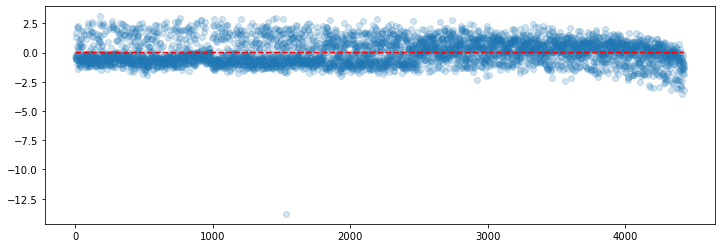

In [247]:
resid = y.values - res.fittedvalues.values.reshape(-1, 1)
plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(resid)), resid, alpha=0.2)
plt.plot(range(0, len(resid)), np.zeros(len(resid)), 'r--');

## Pitchers

In [19]:
p_raw = pd.read_pickle(fp_p)

In [20]:
dims = ["player_name", "year", "team"]
xdims = ["age", "position"]
sal = ["salary", "log_salary", "next_year_salary", "next_year_log_salary", "league_min", "salary_over_minimum", "player_at_min"]
stats = ["avg", "hr", "obp", "ops", "pa", "rbi", "slg", "war"]

In [21]:
pitchers = (p_raw
            .sort_values(dims)
            .assign(one=1)
            .pipe(lambda df: df.assign(year_num=df.groupby(["player_name"]).one.cumsum()))
            .pipe(lambda df: df.assign(position=df.position.apply(lambda s: s.replace(",", " ").split(" ")[0])))
          )

In [22]:
pitchers.head()

,age,era,g,ip,losses,player_name,position,salary,so,so9,...,wins,year,log_salary,next_year_salary,next_year_log_salary,league_min,salary_over_minimum,player_at_min,one,year_num
120,24,4.05,27.0,173.1,12.0,A.J. Burnett,Pitcher,250000.0,128.0,6.6,...,11.0,2001,12.429216,204000.0,12.225875,300000.0,-96000.0,1.0,1,1
123,25,3.30,31.0,204.1,9.0,A.J. Burnett,Pitcher,367500.0,203.0,8.9,...,12.0,2002,12.814479,250000.0,12.429216,300000.0,-50000.0,1.0,1,2
126,26,4.70,4.0,23.0,2.0,A.J. Burnett,Pitcher,2500000.0,21.0,8.2,...,0.0,2003,14.731801,367500.0,12.814479,316000.0,51500.0,0.0,1,3
128,27,3.68,20.0,120.0,6.0,A.J. Burnett,Pitcher,2500000.0,113.0,8.5,...,7.0,2004,14.731801,2500000.0,14.731801,327000.0,2173000.0,0.0,1,4
129,28,3.44,32.0,209.0,12.0,A.J. Burnett,Pitcher,3650000.0,198.0,8.5,...,12.0,2005,15.110238,2500000.0,14.731801,380000.0,2120000.0,0.0,1,5


In [26]:
X_cols = ["year_num", "war"]
y_cols = ['next_year_log_salary']

pitchers = pitchers[pitchers.g > 5]
pitchers = pitchers.sort_values(X_cols[0])
X = pitchers[X_cols]
X = pd.get_dummies(X)
y = pitchers[y_cols]
X = sm.add_constant(X, prepend=False)

mod = sm.OLS(y, X)
res = mod.fit()

C:\Users\David\Anaconda3\envs\jupyter_lab\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [27]:
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     next_year_log_salary   R-squared:                       0.466
Model:                              OLS   Adj. R-squared:                  0.466
Method:                   Least Squares   F-statistic:                     1699.
Date:                  Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                          20:29:22   Log-Likelihood:                -5223.7
No. Observations:                  3894   AIC:                         1.045e+04
Df Residuals:                      3891   BIC:                         1.047e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year_num       0.3745      0.007

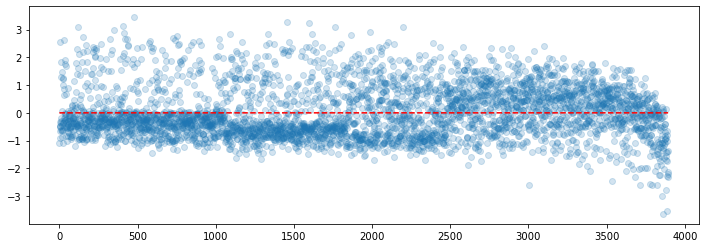

In [28]:
resid = y.values - res.fittedvalues.values.reshape(-1, 1)
plt.figure(figsize=(12, 4))
plt.scatter(range(0, len(resid)), resid, alpha=0.2)
plt.plot(range(0, len(resid)), np.zeros(len(resid)), 'r--');